# Comparação com Modelo XGBoost

**Disciplina:** Redes Neurais Artificiais 2025.1

**Professora orientadora:** 
Elloa B. Guedes (ebgcosta@uea.edu.br)

**Integrantes da equipe:**
* Adriana Raffaella Dos Santos Fonseca (ardsf.eng23@uea.edu.br)
* Ana Flavia De Castro Segadilha Da Silva (afdcsds.eng23@uea.edu.br)
* Davi Aguiar Moreira (dam.eng23@uea.edu.br)
* Guilherme Goncalves Moraes (ggm.eng23@uea.edu.br)
* Ian Garrido Reis (igr.eng23@uea.edu.br)
* Luiz Fernando Borges Brito (lfbb.eng23@uea.edu.br)
* Pedro Vitor Barros Maranhão (pvbm.eng23@uea.edu.br)
* Rita De Cassia Brasil Alves (rdcba.eng23@uea.edu.br)
* Yago De Oliveira Feitoza (ydof.eng21@uea.edu.br)

---

O XGBoost  (ou Extreme Gradient Boost) é inspirado no modelo Random Forests e no método de boosting. Dessa forma, este algoritmo consiste na combinação das predições de várias árvores de decisão de maneira sequencial para obtenção de um modelo forte de machine learning.

Diante da popularidade do modelo XGBoost em competições do Kaggle, as quais utilizam dataset semelhantes ao deste projeto, o presente jupyter notebook tem como objetivo executar a mesma tarefa de classificação com ambas as abordagens adotadas anteriormente (holdout 60/40 e downsampling) a fim de comparar tal modelo com a rede neural artificial MLP obtida. 

## **Importação das bibliotecas**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

### **Importação do dataset com holdout**

In [2]:
X_train = pd.read_csv('holdout/x_train.csv', encoding='utf-8', index_col=0)
X_test = pd.read_csv('holdout/x_test.csv', encoding='utf-8', index_col=0)
y_train = pd.read_csv('holdout/y_train.csv', encoding='utf-8', index_col=0)
y_test = pd.read_csv('holdout/y_test.csv', encoding='utf-8', index_col=0)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [3]:
print(X_train.shape)
X_train.head()

(59999, 6)


,uv,green,red,near_infrared,infrared,redshift
90911,20.62885,20.35993,20.28251,19.91765,19.93754,1.659514
28532,21.95938,21.72848,21.01264,20.37739,19.95506,1.594490
13006,18.77337,17.80002,17.45395,17.31732,17.26414,-0.001246
23585,19.95328,18.69356,18.26171,18.07766,17.98073,0.000266
90377,23.84902,22.26583,21.80329,21.32157,20.60372,0.239443


In [4]:
print(y_train.shape)
y_train.head()

(59999, 1)


,class
90911,1
28532,1
13006,2
23585,2
90377,0


In [5]:
print(X_test.shape)
X_test.head()

(40000, 6)


,uv,green,red,near_infrared,infrared,redshift
26002,22.85773,22.18874,21.35562,21.26577,20.93935,1.174289
80420,22.62560,22.02104,22.06787,22.44037,22.17338,-0.001960
19864,18.18911,16.89469,16.42161,16.24627,16.18549,0.000004
81525,17.57887,16.55078,16.21527,16.10371,16.09738,-0.000165
57878,27.10401,22.65568,21.26362,20.04805,19.61308,0.523852


In [6]:
print(y_test.shape)
y_test.head()

(40000, 1)


,class
26002,1
80420,2
19864,2
81525,2
57878,0


## **Treinamento do modelo XGBoost**

### **Abordagem 1**

In [7]:
first_model = xgb.XGBClassifier(objective='multi:softprob', n_estimators=10000, n_jobs=-1)

In [8]:
first_model.fit(X_train_std, y_train)
y_pred_1 = first_model.predict(X_test_std)

In [9]:
f1_weighted_1 = f1_score(y_test, y_pred_1, average='weighted')

print(f'F1-Score: {f1_weighted_1:.4f}')

F1-Score: 0.9169


In [10]:
f1_macro_1 = f1_score(y_test, y_pred_1, average='macro')

print(f'F1-Score: {f1_macro_1:.4f}')

F1-Score: 0.9069


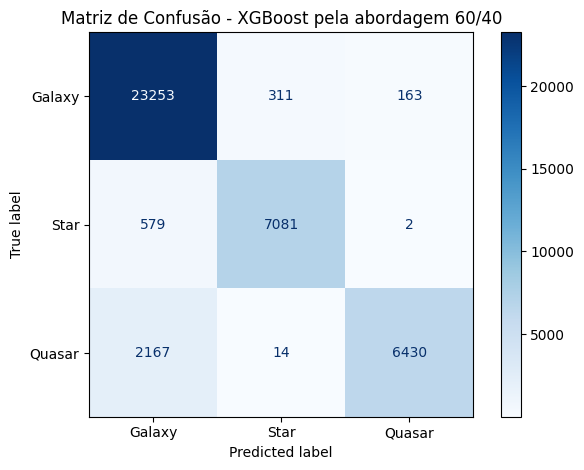

In [11]:
fig, ax = plt.subplots()

cm_test_1 = confusion_matrix(y_test, y_pred_1)
ConfusionMatrixDisplay(confusion_matrix=cm_test_1, display_labels=np.array(['Galaxy', 'Star', 'Quasar'])).plot(ax=ax,cmap="Blues")
ax.set_title("Matriz de Confusão - XGBoost pela abordagem 60/40")

plt.tight_layout()
plt.show()

### **Abordagem 2**

In [12]:
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns, index=X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns=X_test.columns, index=X_test.index)
train_df = pd.concat([X_train_std_df, y_train], axis=1)

class_counts = train_df['class'].value_counts()

min_count = class_counts.min()

balanced_dfs = []

for class_name in class_counts.index:
    class_df = train_df[train_df['class'] == class_name]
    balanced_dfs.append(class_df.sample(min_count, random_state=42))

balanced_train_df = pd.concat(balanced_dfs)

X_train_balanced = balanced_train_df.drop('class', axis=1)
y_train_balanced = balanced_train_df['class']

In [13]:
second_model = xgb.XGBClassifier(objective='multi:softprob', n_estimators=10000, n_jobs=-1)

In [14]:
second_model.fit(X_train_balanced, y_train_balanced)
y_pred_2 = second_model.predict(X_test_std)

In [15]:
f1_weighted_2 = f1_score(y_test, y_pred_2, average='weighted')

print(f'F1-Score: {f1_weighted_2:.4f}')

F1-Score: 0.9526


In [16]:
f1_macro_2 = f1_score(y_test, y_pred_2, average='macro')

print(f'F1-Score: {f1_macro_2:.4f}')

F1-Score: 0.9471


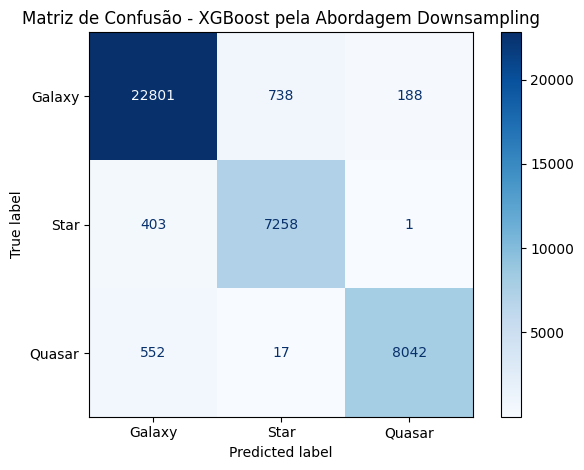

In [17]:
fig, ax = plt.subplots()

cm_test_2 = confusion_matrix(y_test, y_pred_2)
ConfusionMatrixDisplay(confusion_matrix=cm_test_2, display_labels=np.array(['Galaxy', 'Star', 'Quasar'])).plot(ax=ax,cmap="Blues")
ax.set_title("Matriz de Confusão - XGBoost pela Abordagem Downsampling")

plt.tight_layout()
plt.show()

In [27]:
table = PrettyTable()
table.field_names =['F1-Score', 'Holdout 60/40', 'Downsampling']
table.add_row(['Ponderado', f'{f1_weighted_1:.4f}', f'{f1_weighted_2:.4f}'])
table.add_row(['Não ponderado', f'{f1_macro_1:.4f}', f'{f1_macro_2:.4f}'])
print(table)

+---------------+---------------+--------------+
|    F1-Score   | Holdout 60/40 | Downsampling |
+---------------+---------------+--------------+
|   Ponderado   |     0.9169    |    0.9526    |
| Não ponderado |     0.9069    |    0.9471    |
+---------------+---------------+--------------+
